# Unit 5 - Financial Planning

In [1]:
# Initial imports
import json
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_response.content

b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 19548450,\n\t\t\t"total_supply": 19548450,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 37464.0000000000000000,\n\t\t\t\t\t"volume_24h": 20677918972,\n\t\t\t\t\t"market_cap": 732863775658,\n\t\t\t\t\t"percentage_change_1h": -0.1989430769210540,\n\t\t\t\t\t"percentage_change_24h": 0.7535429745913350,\n\t\t\t\t\t"percentage_change_7d": 2.7519775083163200,\n\t\t\t\t\t"percent_change_1h": -0.1989430769210540,\n\t\t\t\t\t"percent_change_24h": 0.7535429745913350,\n\t\t\t\t\t"percent_change_7d": 2.7519775083163200\n\t\t\t\t}\n\t\t\t},\n\t\t\t"last_updated": 1700541590\n\t\t}\n\t},\n\t"metadata": {\n\t\t"timestamp": 1700541590,\n\t\t"num_cryptocurrencies": 3119,\n\t\t"error": null\n\t}\n}'

In [6]:
bit_coin = btc_response.json()

In [7]:
bit_coin = json.dumps(bit_coin, indent=4)
bit_coin = json.loads(bit_coin)
print(bit_coin)

{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 19548450, 'total_supply': 19548450, 'max_supply': 21000000, 'quotes': {'USD': {'price': 37464.0, 'volume_24h': 20677918972, 'market_cap': 732863775658, 'percentage_change_1h': -0.198943076921054, 'percentage_change_24h': 0.753542974591335, 'percentage_change_7d': 2.75197750831632, 'percent_change_1h': -0.198943076921054, 'percent_change_24h': 0.753542974591335, 'percent_change_7d': 2.75197750831632}}, 'last_updated': 1700541590}}, 'metadata': {'timestamp': 1700541590, 'num_cryptocurrencies': 3119, 'error': None}}


In [8]:
print(bit_coin['data']['1']['quotes']['USD']['price'])

37464.0


In [9]:
btc_price = bit_coin['data']['1']['quotes']['USD']['price']
btc_price

37464.0

In [10]:
# Fetch current ETH price
eth_response = requests.get(eth_url)
eth_response.content

b'{\n\t"data": {\n\t\t"1027": {\n\t\t\t"id": 1027,\n\t\t\t"name": "Ethereum",\n\t\t\t"symbol": "ETH",\n\t\t\t"website_slug": "ethereum",\n\t\t\t"rank": 2,\n\t\t\t"circulating_supply": 120251000,\n\t\t\t"total_supply": 120251000,\n\t\t\t"max_supply": 120251000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 2017.4800000000000000,\n\t\t\t\t\t"volume_24h": 18849105095,\n\t\t\t\t\t"market_cap": 242571270329,\n\t\t\t\t\t"percentage_change_1h": -0.0953931045825105,\n\t\t\t\t\t"percentage_change_24h": 0.6814974542713520,\n\t\t\t\t\t"percentage_change_7d": -1.8616573922505600,\n\t\t\t\t\t"percent_change_1h": -0.0953931045825105,\n\t\t\t\t\t"percent_change_24h": 0.6814974542713520,\n\t\t\t\t\t"percent_change_7d": -1.8616573922505600\n\t\t\t\t}\n\t\t\t},\n\t\t\t"last_updated": 1700541597\n\t\t}\n\t},\n\t"metadata": {\n\t\t"timestamp": 1700541597,\n\t\t"num_cryptocurrencies": 3119,\n\t\t"error": null\n\t}\n}'

In [11]:
ethereum = eth_response.json()

In [12]:
ethereum = json.dumps(ethereum, indent=4)
ethereum = json.loads(ethereum)
print(ethereum)

{'data': {'1027': {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'website_slug': 'ethereum', 'rank': 2, 'circulating_supply': 120251000, 'total_supply': 120251000, 'max_supply': 120251000, 'quotes': {'USD': {'price': 2017.48, 'volume_24h': 18849105095, 'market_cap': 242571270329, 'percentage_change_1h': -0.0953931045825105, 'percentage_change_24h': 0.681497454271352, 'percentage_change_7d': -1.86165739225056, 'percent_change_1h': -0.0953931045825105, 'percent_change_24h': 0.681497454271352, 'percent_change_7d': -1.86165739225056}}, 'last_updated': 1700541597}}, 'metadata': {'timestamp': 1700541597, 'num_cryptocurrencies': 3119, 'error': None}}


In [13]:
print(ethereum['data']['1027']['quotes']['USD']['price'])

2017.48


In [14]:
eth_price = ethereum['data']['1027']['quotes']['USD']['price']

In [15]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $44956.80
The current value of your 5.3 ETH is $10692.64


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [16]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [17]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [18]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [19]:
# Format current date as ISO format
today = pd.Timestamp('2023-11-20', tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_invst = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_invst[df_invst['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_invst[df_invst['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_invst = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_invst

AGG                                            \
                          close   high    low trade_count   open   volume   
timestamp                                                                   
2023-11-20 05:00:00+00:00  95.4  95.42  95.07       30814  95.07  9530150   

                                         SPY                               \
                                vwap   close     high     low trade_count   
timestamp                                                                   
2023-11-20 05:00:00+00:00  95.250122  454.26  455.125  450.52      487767   

                                                         
                             open    volume        vwap  
timestamp                                                
2023-11-20 05:00:00+00:00  450.53  69938741  453.289373

In [20]:
df_invst.index = df_invst.index.date
df_invst

AGG                                                          SPY  \
           close   high    low trade_count   open   volume       vwap   close   
2023-11-20  95.4  95.42  95.07       30814  95.07  9530150  95.250122  454.26   

                                                                       
               high     low trade_count    open    volume        vwap  
2023-11-20  455.125  450.52      487767  450.53  69938741  453.289373

In [21]:
# Pick AGG and SPY close prices
agg_close_price = float(df_invst['AGG']['close'])
spy_close_price = float(df_invst['SPY']['close'])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $95.4
Current SPY closing price: $454.26


In [22]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22713.00
The current value of your 200 AGG shares is $19080.00


### Savings Health Analysis

In [23]:
# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value
print(crypto)
print(shares)

55649.443999999996
41793.0


In [24]:
# Set monthly household income
monthly_income = 12000
          
# Create savings DataFrame
df_savings = pd.DataFrame({'Amount': [crypto, shares]}, index = ['Crypto Value', 'Shares Value'])

# Display savings DataFrame
df_savings

,Amount
Crypto Value,55649.444
Shares Value,41793.000


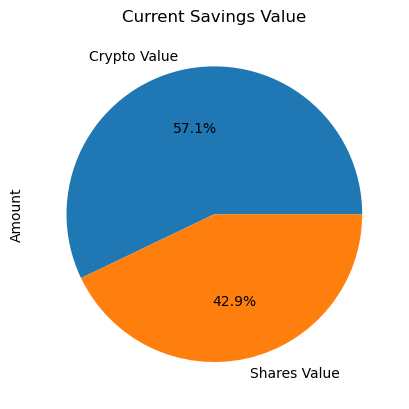

In [25]:
# Plot savings pie chart
df_savings.plot.pie(y='Amount', title = 'Current Savings Value', legend=False, autopct='%1.1f%%');

In [26]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(emergency_fund)
# Calculate total amount of savings
total_savings = df_savings['Amount'].sum()
print(round(total_savings, 2))
# Validate saving health
if total_savings > emergency_fund:
    print(f'Congratulations you have more than enough in your savings!!')
elif total_savings == emergency_fund:
    print('Good Job! you have just enough in your saving')
elif total_savings < emergency_fund:
    print(f'Sorry, but you still need ${emergency_fund-total_savings} to complete your emergency fund') 

36000
97442.44
Congratulations you have more than enough in your savings!!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [27]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-05-01', tz='America/New_York').isoformat()

In [28]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG_hist = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY_hist = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG_hist, SPY_hist],axis=1, keys=['AGG','SPY'])
df_stock_data.index = df_stock_data.index.date
# Display sample data
df_stock_data.head()

AGG                                                           \
             close    high     low trade_count    open   volume        vwap   
2018-05-01  105.67  105.79  105.60       11965  105.73  3385450  105.662373   
2018-05-02  105.67  105.78  105.62       11838  105.70  2926894  105.677062   
2018-05-03  105.79  105.95  105.78       14802  105.82  4592146  105.873997   
2018-05-04  105.86  105.93  105.71        9991  105.92  2497682  105.827710   
2018-05-07  105.81  105.88  105.77        7644  105.88  1645406  105.816368   

               SPY                                                   \
             close      high     low trade_count    open     volume   
2018-05-01  264.96  265.1000  262.11      296316  263.90   77000433   
2018-05-02  263.17  265.6800  262.76      300566  264.76   87960465   
2018-05-03  262.59  263.3600  259.05      519979  262.26  138114268   
2018-05-04  265.92  266.7892  261.15      326637  261.52   92744409   
2018-05-07  266.92  268.0200  266.11      242694  266.89   56246159   

                        
                  vwap  
2018-05-01  263.937778  
2018-05-02  264.101782  
2018-05-03  261.695409  
2018-05-04  264.873781  
2018-05-07  267.101522

In [29]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500

MC_stock_data = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*30,
    weights = [.40, .60])

In [30]:
# Printing the simulation input data
MC_stock_data

In [31]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997254,1.005254,1.002648,0.990671,0.999398,1.008662,1.000418,0.998035,1.004521,0.989416,...,1.003897,0.998045,0.997227,0.995933,1.006519,1.006283,0.998640,1.004126,0.994723,1.010274
2,1.010506,1.005027,1.004591,0.989492,0.996928,0.994673,0.994818,1.006247,1.013756,0.996616,...,1.014447,1.001972,1.002313,1.009344,1.005751,1.001601,0.995341,1.010550,0.981528,0.999434
3,1.015731,1.007666,1.011828,1.004555,1.015406,0.984917,0.984996,1.006078,1.014361,0.993054,...,1.014257,1.011570,1.002689,1.005621,1.009656,1.003979,0.992959,1.005101,0.986728,0.998252
4,1.004912,1.003679,1.028316,1.009045,1.009023,0.994277,0.992018,0.994133,1.004307,0.990714,...,1.003218,1.012337,0.987620,1.017994,1.010224,1.012264,0.983890,1.010353,0.980548,0.997751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.739044,14.496210,4.206704,8.282108,5.620031,9.943281,4.976773,1.545992,12.114145,4.020029,...,2.389718,4.838723,3.447197,1.627218,6.032334,11.678061,3.870952,12.123371,2.688370,15.368180
7557,2.736667,14.489660,4.199213,8.215023,5.631949,10.095207,4.953212,1.575050,12.033168,4.035788,...,2.386270,4.853100,3.431061,1.631535,6.019011,11.647533,3.861798,12.132190,2.718073,15.512450
7558,2.741674,14.391549,4.204460,8.145859,5.657719,10.044182,4.900385,1.564083,12.208535,4.005937,...,2.396679,4.793409,3.425377,1.638185,6.131244,11.465085,3.846149,12.071620,2.678604,15.823602
7559,2.749760,14.466620,4.205666,8.086640,5.664433,9.932962,4.926627,1.558597,12.245228,3.937709,...,2.426611,4.798586,3.403968,1.651742,6.069470,11.590335,3.852481,11.987230,2.675302,15.820377


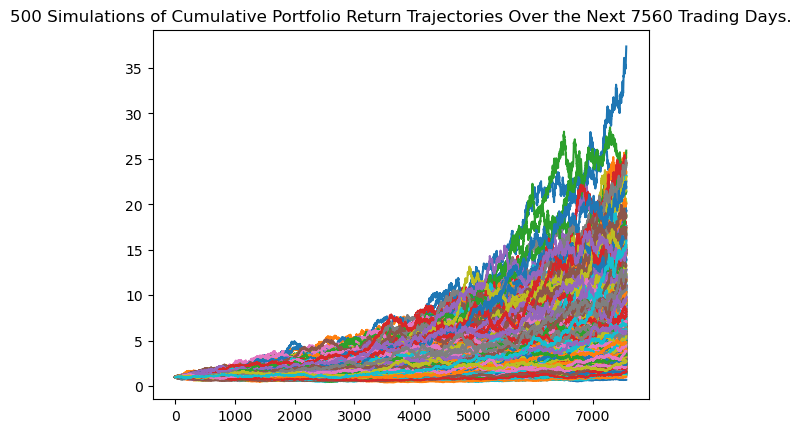

In [32]:
# Plot simulation outcomes
line_plot = MC_stock_data.plot_simulation()

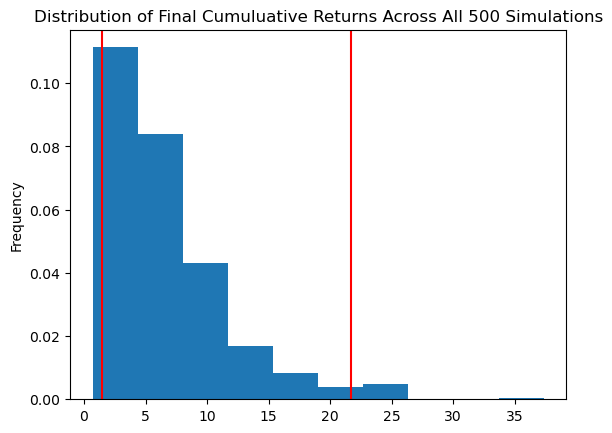

In [33]:
# Plot probability distribution and confidence intervals
conf_dist_plot = MC_stock_data.plot_distribution()

### Retirement Analysis

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
sim_stats = MC_stock_data.summarize_cumulative_return()
# Print summary statistics
print(sim_stats)

count           500.000000
mean              6.617609
std               4.992946
min               0.714416
25%               3.091153
50%               5.351289
75%               8.454951
max              37.358339
95% CI Lower      1.424696
95% CI Upper     21.655562
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [35]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(sim_stats[8]*initial_investment,2)
ci_upper = round(sim_stats[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $28493.93 and $433111.23


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [36]:
# Set initial investment
initial_investmentv2 = round(initial_investment * 1.5)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lowerv2 = round(sim_stats[8]*initial_investmentv2,2)
ci_upperv2 = round(sim_stats[9]*initial_investmentv2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investmentv2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lowerv2} and ${ci_upperv2}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 30 years will end within in the range of $42740.89 and $649666.85


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [37]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stock_data_5y = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*5,
    weights = [.25, .75])

In [38]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stock_data_5y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.016150,0.998012,1.004076,1.007022,0.996169,1.001803,1.008350,0.989906,0.982597,1.015612,...,1.001403,0.994892,0.971340,1.005465,0.997424,1.002026,0.993630,1.007769,0.999434,1.007893
2,1.014419,1.001402,0.984880,1.003785,0.986799,1.008293,1.008712,0.978173,0.978363,1.007351,...,0.999810,1.006478,0.982187,0.996798,0.995861,0.985109,1.004999,1.019512,0.998519,1.007774
3,1.024860,1.005435,0.993314,0.988230,0.992844,1.015624,1.003233,0.975645,0.977201,1.014000,...,0.991991,1.016034,0.967731,0.995794,0.977987,0.977411,1.005352,1.012514,1.006254,1.004147
4,1.015516,1.012305,1.003466,0.988654,0.993827,1.020302,1.004876,0.965910,0.977659,1.007858,...,0.986642,1.011601,0.962295,0.991765,0.980607,0.976206,1.012362,0.996042,1.000806,1.005747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.307142,1.763626,1.631750,1.506074,0.740483,1.696742,1.156124,1.483428,0.879684,1.384762,...,1.565144,2.780474,0.759978,1.150671,1.383578,1.099703,1.261451,0.975907,2.151993,1.794069
1257,1.304192,1.784296,1.653492,1.520868,0.738623,1.698719,1.156627,1.467667,0.881747,1.361696,...,1.567971,2.787223,0.750391,1.133218,1.373374,1.104766,1.272915,1.003883,2.114356,1.783077
1258,1.296879,1.798502,1.636338,1.530380,0.746103,1.711467,1.137022,1.474988,0.880026,1.384503,...,1.577061,2.806621,0.750146,1.143714,1.363382,1.099200,1.282802,0.993246,2.138381,1.759339
1259,1.291196,1.751065,1.642220,1.554282,0.746005,1.704506,1.126507,1.474010,0.883210,1.400393,...,1.566014,2.768137,0.748534,1.157026,1.366245,1.098685,1.278253,0.998743,2.128242,1.753953


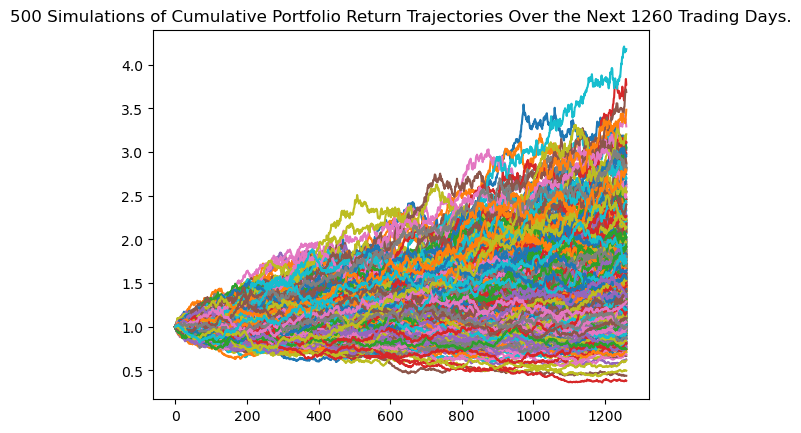

In [39]:
# Plot simulation outcomes
line_plot_5y = MC_stock_data_5y.plot_simulation()

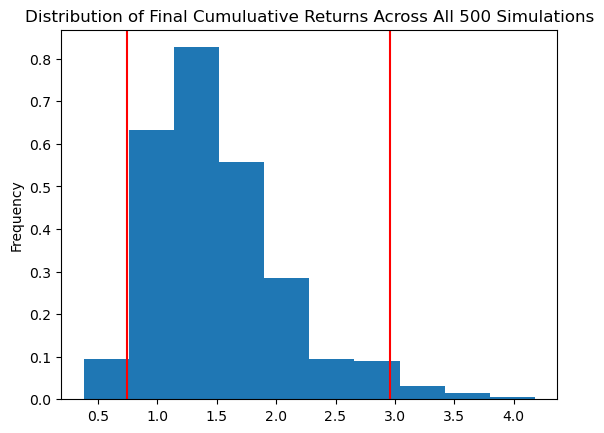

In [40]:
# Plot probability distribution and confidence intervals
conf_dist_plot_5y = MC_stock_data_5y.plot_distribution()

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
sim_stats_5y = MC_stock_data_5y.summarize_cumulative_return()
# Print summary statistics
print(sim_stats_5y)

count           500.000000
mean              1.515543
std               0.569433
min               0.381076
25%               1.116055
50%               1.416314
75%               1.775584
max               4.179024
95% CI Lower      0.739530
95% CI Upper      2.959719
Name: 1260, dtype: float64


In [42]:
# Set initial investment 
# Including an input statement to give more options in initial investment. 
initial_investment_5y = int(input('What would you like your initial investment to be?(Please use whole numbers.)'))
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our initial investment
ci_lower_5y = round(sim_stats_5y[8]*initial_investment_5y,2)
ci_upper_5y = round(sim_stats_5y[9]*initial_investment_5y,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5y} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5y} and ${ci_upper_5y}")

What would you like your initial investment to be?(Please use whole numbers.) 100000


There is a 95% chance that an initial investment of $100000 in the portfolio over the next 5 years will end within in the range of $73953.04 and $295971.9


### Ten Years Retirement Option

In [43]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stock_data_10y = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*10,
    weights = [.10, .90])

In [44]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stock_data_10y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994812,0.995853,1.023295,1.002290,0.998235,1.003536,0.987615,1.020541,1.020921,0.988682,...,1.004383,1.010643,0.988334,1.013388,0.982440,0.997093,0.996642,1.016568,0.998251,0.998072
2,0.991483,1.007341,1.036175,0.994847,0.994809,1.011284,0.975657,1.009370,1.015889,0.969394,...,1.017952,0.990550,0.973721,1.020176,0.980498,1.011281,1.000892,1.017439,0.989961,0.992398
3,0.986739,0.989583,1.030849,1.014735,1.010144,0.988148,0.975418,1.006142,1.020471,0.975848,...,1.004443,0.974599,0.968700,1.007701,1.006212,1.015813,1.006707,1.023137,0.992513,1.007944
4,0.981936,0.991930,1.047040,1.013283,1.016394,0.986880,0.988207,1.004493,1.016031,0.966265,...,1.007155,0.977835,0.952716,1.001634,1.002051,1.022971,1.009507,1.003085,1.005531,1.001538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.463962,2.449913,2.366700,0.870382,1.471359,1.414608,1.767448,2.668250,3.336595,0.973927,...,1.280647,3.647879,2.990050,1.838972,1.984423,1.400073,0.650588,1.424768,0.748862,2.639896
2517,1.484549,2.462116,2.351778,0.856557,1.463309,1.417248,1.765161,2.673919,3.354999,0.976910,...,1.298000,3.585848,3.049551,1.852883,2.003525,1.372081,0.656671,1.429611,0.739319,2.616738
2518,1.466591,2.443615,2.373256,0.869267,1.466706,1.404937,1.749639,2.735110,3.427187,0.969300,...,1.277022,3.587490,3.078935,1.851045,2.002676,1.388432,0.661030,1.426377,0.745077,2.584678
2519,1.478383,2.451256,2.413916,0.880075,1.451216,1.431514,1.770271,2.709710,3.436593,0.967982,...,1.254225,3.629885,3.074809,1.854753,1.990790,1.391774,0.647153,1.438411,0.763799,2.560639


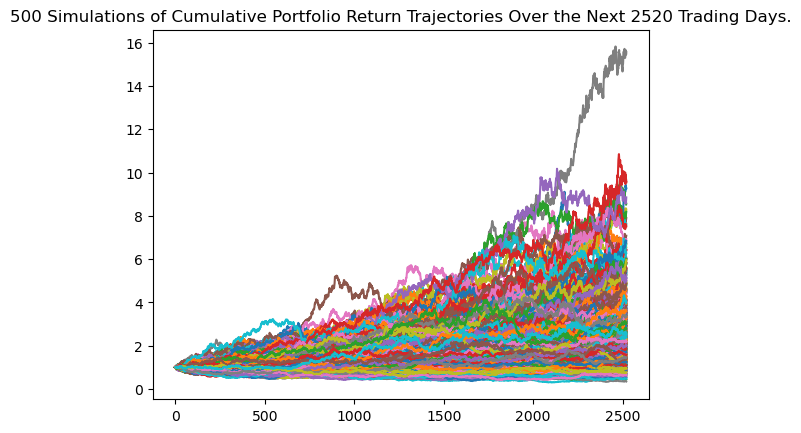

In [45]:
# Plot simulation outcomes
line_plot_10y = MC_stock_data_10y.plot_simulation()

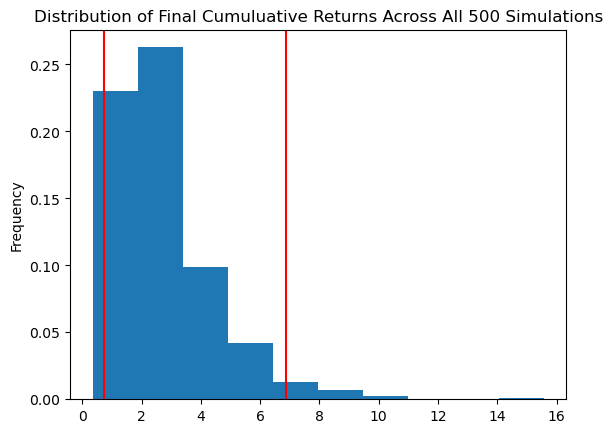

In [46]:
# Plot probability distribution and confidence intervals
conf_dist_plot_10y = MC_stock_data_10y.plot_distribution()

In [47]:
# Fetch summary statistics from the Monte Carlo simulation results
sim_stats_10y = MC_stock_data_10y.summarize_cumulative_return()
# Print summary statistics
print(sim_stats_10y)

count           500.000000
mean              2.730076
std               1.702054
min               0.349909
25%               1.596822
50%               2.312164
75%               3.393547
max              15.567980
95% CI Lower      0.720383
95% CI Upper      6.882806
Name: 2520, dtype: float64


In [48]:
# Set initial investment 
# Including an input statement to give more options in initial investment. 
initial_investment_10y = int(input('What would you like your initial investment to be?(Please use whole numbers.)'))
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our initial investment
ci_lower_10y = round(sim_stats_10y[8]*initial_investment_10y,2)
ci_upper_10y = round(sim_stats_10y[9]*initial_investment_10y,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10y} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10y} and ${ci_upper_10y}")

What would you like your initial investment to be?(Please use whole numbers.) 120000


There is a 95% chance that an initial investment of $120000 in the portfolio over the next 10 years will end within in the range of $86445.95 and $825936.77


In [58]:
print('Investment Strategy Summary''\n''___________________________________________________'
      '\n'

f'30 year retirement - ${initial_investment} initial investment''\n'
      '-------------------------------------------------''\n'
      f'Low Range : {ci_lower}''\n'
      f'High Range : {ci_upper}''\n'
'___________________________________________________''\n'   
      '\n'
f'30 year retirement - ${initial_investmentv2} initial investment''\n'
      '-------------------------------------------------''\n'
      f'Low Range : {ci_lowerv2}''\n'
      f'High Range : {ci_upperv2}''\n'
'___________________________________________________''\n'
      '\n'
f'5 year retirement - ${initial_investment_5y} initial investment''\n'
      '-------------------------------------------------''\n'
      f'Low Range : {ci_lower_5y}''\n'
      f'High Range : {ci_upper_5y}''\n'
'___________________________________________________''\n'
      '\n'
f'10 year retirement - ${initial_investment_10y} initial investment''\n'
      '-------------------------------------------------''\n'
      f'Low Range : {ci_lower_10y}''\n'
      f'High Range : {ci_upper_10y}''\n'
'___________________________________________________')

Investment Strategy Summary
___________________________________________________
30 year retirement - $20000 initial investment
-------------------------------------------------
Low Range : 28493.93
High Range : 433111.23
___________________________________________________

30 year retirement - $30000 initial investment
-------------------------------------------------
Low Range : 42740.89
High Range : 649666.85
___________________________________________________

5 year retirement - $100000 initial investment
-------------------------------------------------
Low Range : 73953.04
High Range : 295971.9
___________________________________________________

10 year retirement - $120000 initial investment
-------------------------------------------------
Low Range : 86445.95
High Range : 825936.77
___________________________________________________
